<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week1_CommonDists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222 
# Scale, Location, and Some Common Continuous Distributions


In this video we will discuss how scale and location parameters impact a disribution and then show how this works with several common distributions in Python (scipy).



### Location and Scale

It's useful first to undestand how a continous distribution is altered when the RV and shifted and scaled to a new RV.

Suppose that $X$ is a continous random variable with CDF $F_X(x)$ and PDF $f_X(x)$.

We apply the transform  $Y = \eta X + \xi$, 

and we will call $\eta$ the *scale* parameter and $\xi$ the *location* parameter.

We wish to understand  new CDF $F_Y(y)$ and PDF $f_Y(y)$.

For a given $y$,

$$F_Y(y) = \mathrm{Pr}(Y \leq y)\\
=\mathrm{Pr}(\eta X + \xi \leq y)\\
=\mathrm{Pr}(X \leq \frac{y - \xi}{\eta})\\
=F_X\left( \frac{y - \xi}{\eta}\right)$$


It follows that 

$$f_Y(y) = \frac{d F_Y(y)}{dy}\\
=\frac{F_X\left( \frac{y - \xi}{\eta}\right)}{dy}\\
= \frac{1}{\eta}f_X\left( \frac{y - \xi}{\eta}\right)$$





It's also easy (and hopefully intuitive) to see that

$\mu_y = \eta \mu_X + \xi$

and 

$\sigma^2_Y = \eta^2 \sigma_X^2$

## Normal Distribution

We start with the Standard Normal disribution.

$$\phi(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}$$

This has mean $\mu_X = 0$ and variance $\sigma^2 = 1$.

In scipy, we can generate a normal distribution of aribrary mean $\mu$ and variance $\sigma^2$ by setting the location parameter $\xi = mu$ and scale parameter $\eta = \sigma$.

### Example

Plot the PDFs of the normal distribution for the following location and scale parameters $(\xi, \eta)$:

1. (0,1)
2. (3,1)
3. (0,2)
4. (3,2)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss


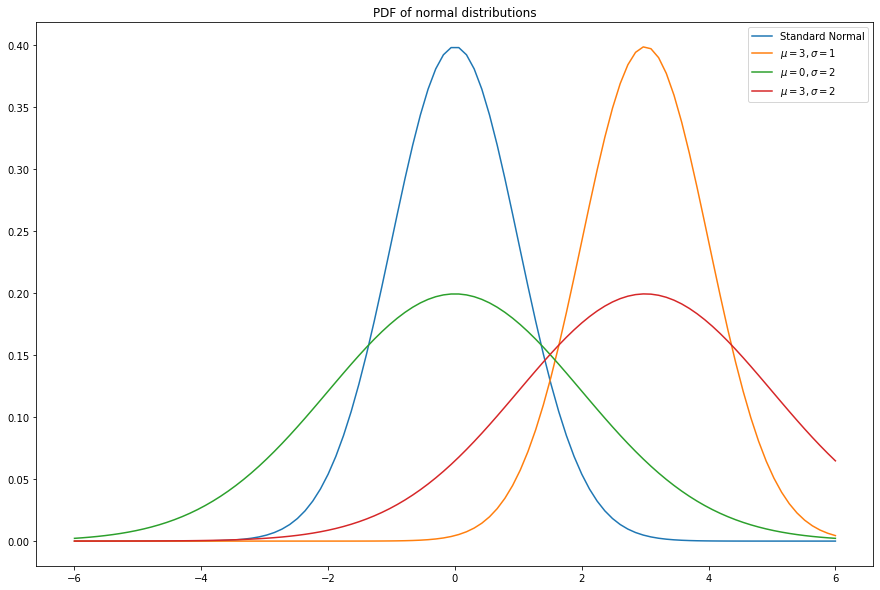

In [ ]:
x = np.linspace(-6,6,100)

plt.figure(figsize = (15,10))

plt.plot(x, ss.norm.pdf(x), label="Standard Normal")

plt.plot(x, ss.norm.pdf(x, loc = 3), label="$\mu = 3, \sigma = 1$")

plt.plot(x, ss.norm.pdf(x, scale = 2), label="$\mu = 0, \sigma = 2$")


plt.plot(x, ss.norm.pdf(x,loc = 3, scale = 2), label="$\mu = 3, \sigma = 2$")

plt.legend()

plt.title("PDF of normal distributions")

plt.show()

## Lognormal Distribution

$X$ is said to follow the lognormal distribution if $\ln(X)$ is normal. 

The mean and standard deviations of $\ln(X)$ (which is normally distributed) are called the $\mu$ and $\sigma$ parameters.  Note that they are not the mean and standard deviation of $X$.

In fact,

$\mathrm{E}(X) = e^{\mu + \frac{1}{2}\sigma^2}$

and

$\mathrm{Var}(X) = \left(e^{\sigma^2} -1\right)e^{2\mu + \sigma^2}$


In scipy.stats, the default is $\mu = 0$ but you must specify the $\sigma$ parameter (they use "s").

If you wish to specify $\mu$, you do not use the location parameter becauses this will just shift the domain of the distribution away from zero.   Instead, you specify the *scale* parameter to be $\eta = e^{\mu}$

To see this, note that for some parameter $s$, $ln(X)$ will be normal with a mean of $0$ and standard deviation of $s$.

Now suppose you set the scale $\eta = e^{\mu}$.  The you are transforming $X \to Xe^{\mu}$.

This in turn means you are transforming $\ln(X) \to \ln\left(Xe^{\mu}    \right) = X + \mu$.

Which is exactly what you wanted.



Example.

Plot the lognormal PDF ($\sigma = 1$) with the following combinations of $(\xi, \eta)$:

1. (0,1)
2. (0,1.5)
3. (-1,1)
4. (2, 0.5)



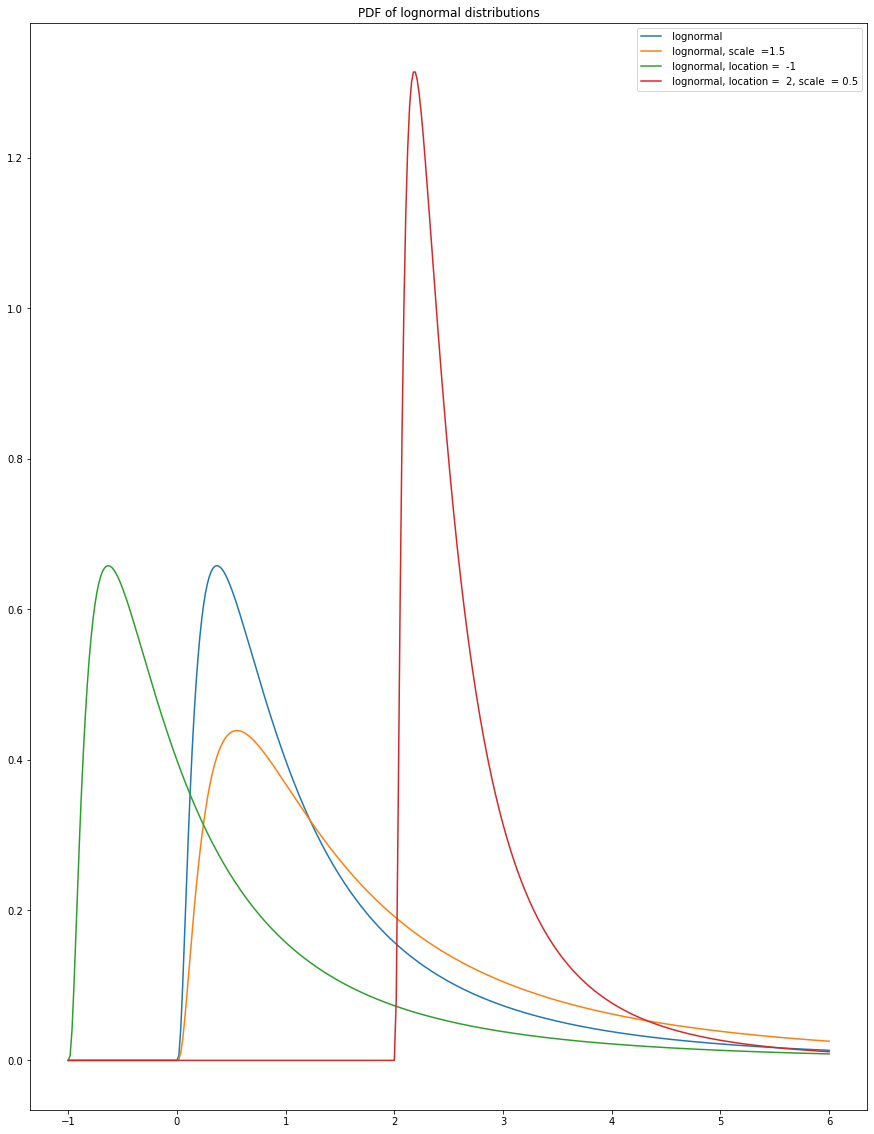

In [ ]:
x = np.linspace(-1,6,400)

plt.figure(figsize = (15,20))

plt.plot(x, ss.lognorm.pdf(x, s= 1), label=" lognormal")

plt.plot(x, ss.lognorm.pdf(x, s= 1, scale = 1.5), label=" lognormal, scale  =1.5")

plt.plot(x, ss.lognorm.pdf(x, s= 1, loc = -1), label=" lognormal, location =  -1")

plt.plot(x, ss.lognorm.pdf(x, s= 1, loc = 2, scale = 0.5), label=" lognormal, location =  2, scale  = 0.5")


plt.legend()

plt.title("PDF of lognormal distributions")

plt.show()

Example, plot the lognormal distribution with $\sigma = 1,3,\text{and } \frac{1}{2}$

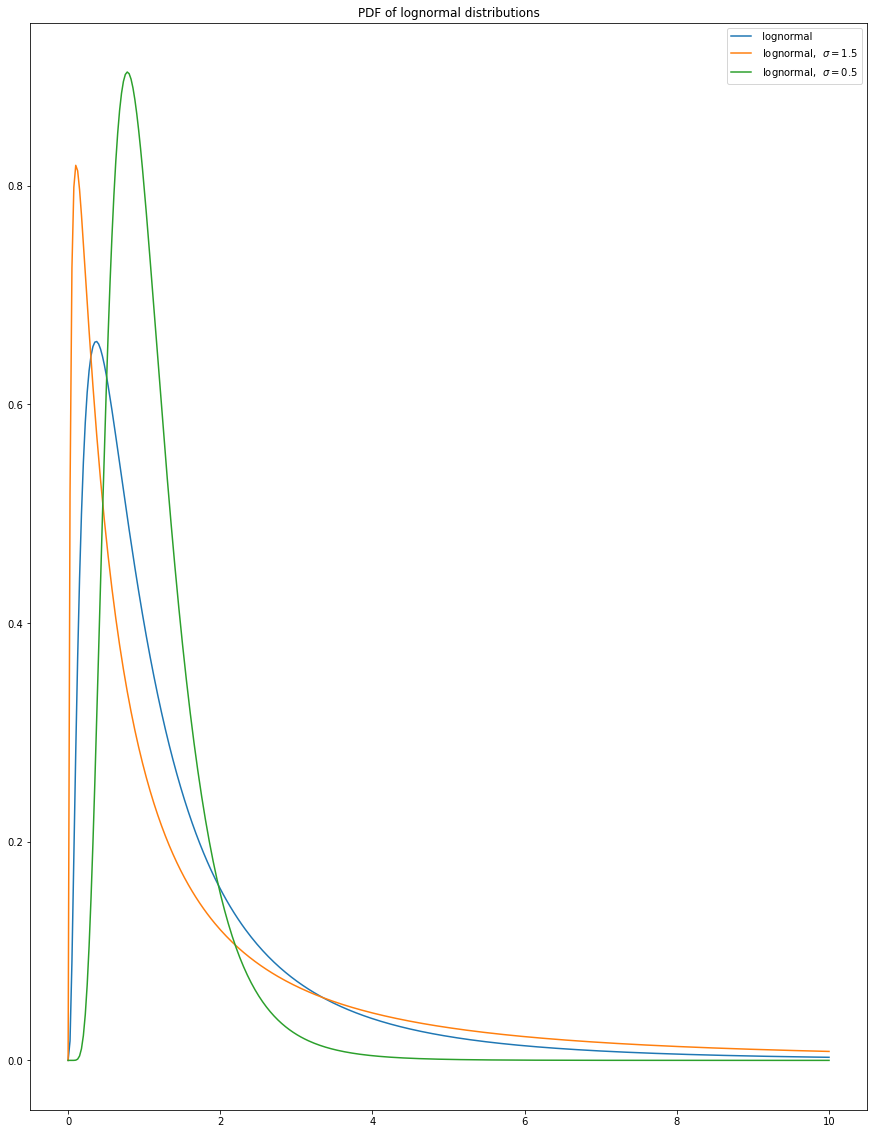

In [ ]:
x = np.linspace(0,10,400)

plt.figure(figsize = (15,20))

plt.plot(x, ss.lognorm.pdf(x, s= 1), label=" lognormal")

plt.plot(x, ss.lognorm.pdf(x, s= 1.5), label=" lognormal,  $\sigma = 1.5$")

plt.plot(x, ss.lognorm.pdf(x, s= 0.5), label=" lognormal,  $\sigma = 0.5$")




plt.legend()

plt.title("PDF of lognormal distributions")

plt.show()

## Student's T Distribution

Similar to Normal but with heavier tails.   The PDF is 

$f_X(x) = \frac{\Gamma\left(\frac{\nu +1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(   1+ \frac{x^2}{\nu}\right)^{-\frac{\nu +1}{2}}$


In scipy.stats, parameter $\nu$ must be specified using "df=" 

$\mathrm{E}(X) = 0$

$\mathrm{Var}(X) = \frac{\nu}{\nu -2}$  ( Note that if $\nu \leq 2$, this is undefined).


#### Example

Plot the Students T PDF for the following choices of $(\nu, \xi, \eta)$:

1. (10,0,1)
2. (10,3,2)
3. (2.5, 0,1)







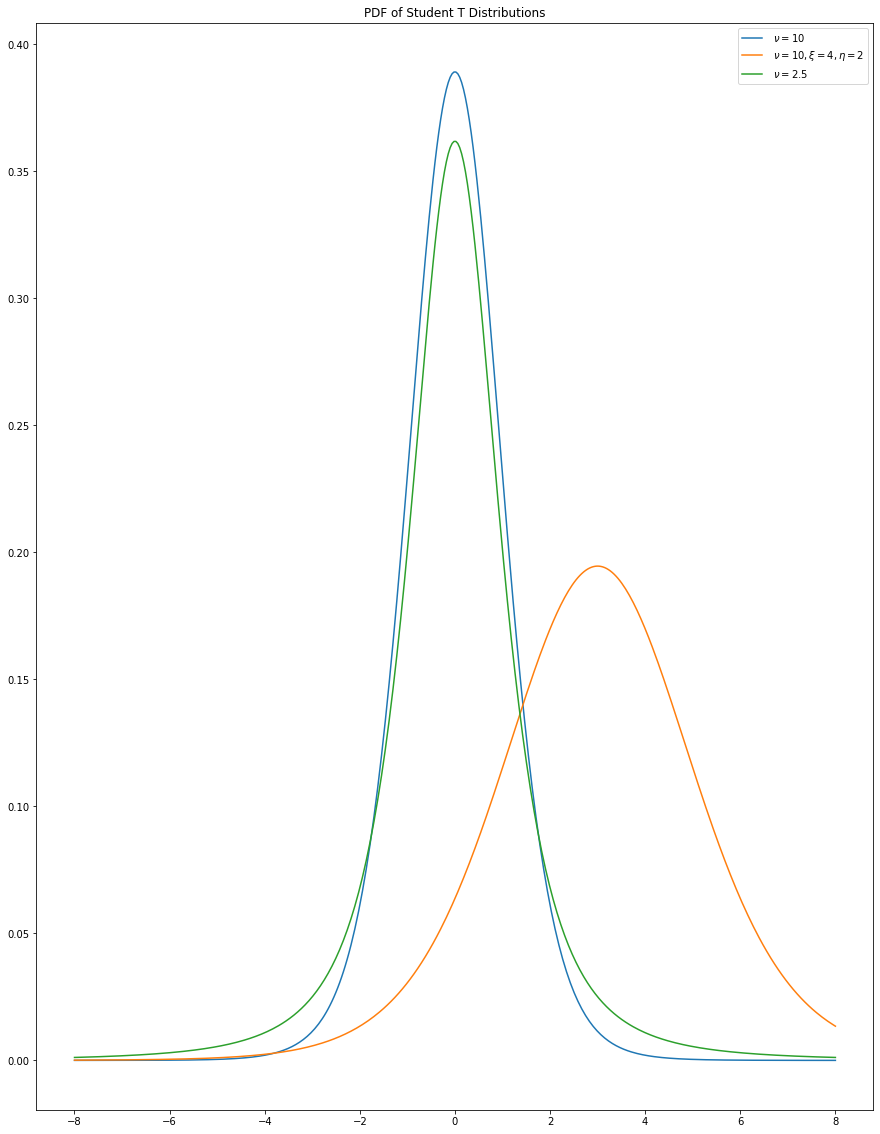

In [ ]:
x = np.linspace(-8,8,400)

plt.figure(figsize = (15,20))

plt.plot(x, ss.t.pdf(x, df= 10), label=" $\\nu = 10$")


plt.plot(x, ss.t.pdf(x, df= 10, loc = 3, scale = 2), label=" $\\nu = 10, \\xi = 4,\\eta = 2 $")

plt.plot(x, ss.t.pdf(x, df= 2.5), label=" $\\nu = 2.5$")




plt.legend()

plt.title("PDF of Student T Distributions")

plt.show()

## Exponential Distribution

$X$ follows the exponential distribution if

$f_X(x) = \lambda e^{-\lambda x}$

Note that it easy to see that the CDF is $F_X(x) = 1- e^{-\
\lambda x}$


For this distribution,

$\mu_X  = \frac{1}{\lambda}$

and

$\sigma^2_X = \frac{1}{\lambda^2}$


Comment: Sometime the parameter is given as an "arrival rate" parameter $\tau$ , in which case it is $\tau = \frac{1}{\lambda}$

In scipy.stat, the default is $\lambda = 1$.  One can choose an aribtrary $\lambda$ by setting $scale  = \frac{1}{\lambda}$


#### Example

Plot the PDF of the lamba distribution for the follow location and scale combinatins $(\xi, \eta)$

** Fixed since video was made!**

1.$(0,1)$

2.$(0, 0.5)$

3.$(2, 1)$

4.$(2,3)$




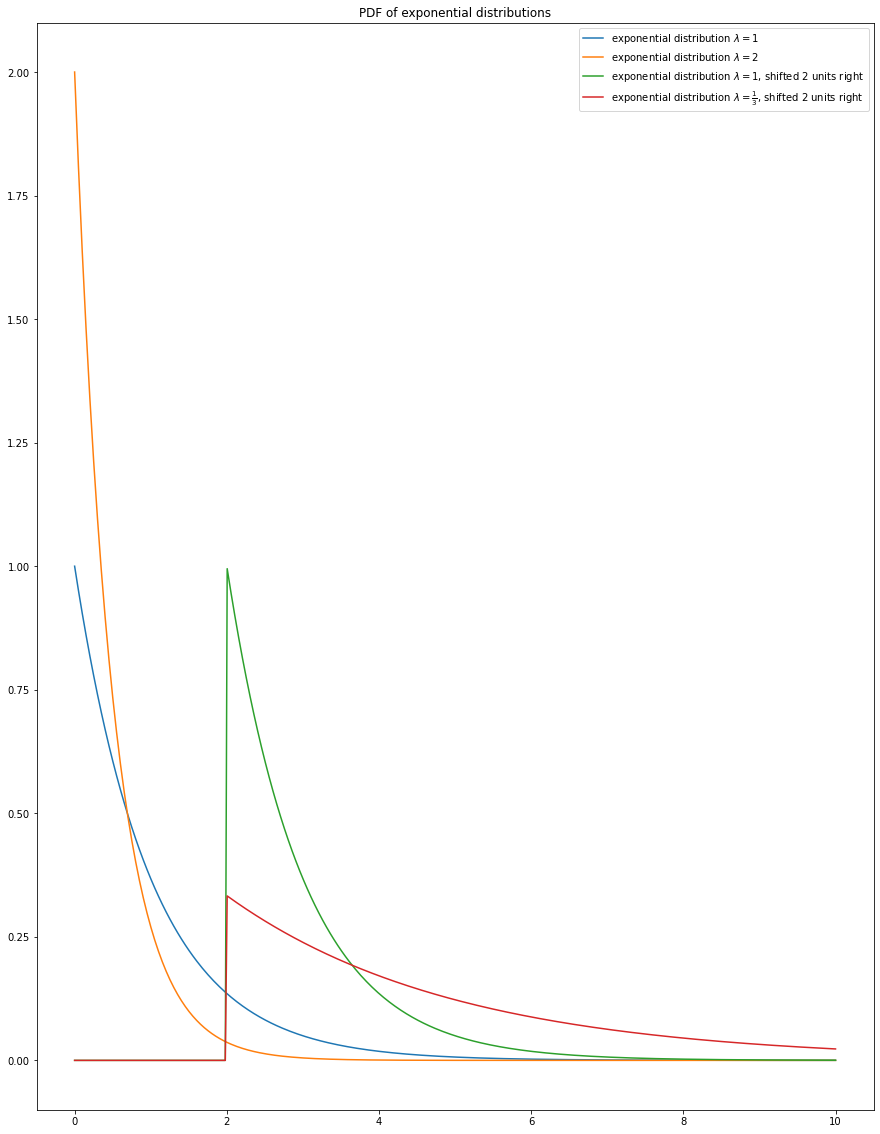

In [ ]:
x = np.linspace(0,10,400)

plt.figure(figsize = (15,20))

plt.plot(x, ss.expon.pdf(x), label="exponential distribution $\lambda = 1$")

plt.plot(x, ss.expon.pdf(x, scale = 0.5), label="exponential distribution $\lambda = 2$")

plt.plot(x, ss.expon.pdf(x, loc = 2), label="exponential distribution $\lambda = 1$, shifted 2 units right")

plt.plot(x, ss.expon.pdf(x, loc = 2,scale =3), label="exponential distribution $\lambda = \\frac{1}{3}$, shifted 2 units right")




plt.legend()

plt.title("PDF of exponential distributions")

plt.show()

## Gamma Distribution

The Gamma distribution is used in many applications.  It has two parameters $\alpha$ and $\beta$

$X$ is from the gamma distribution if

$$f_X(x) = \frac{1}{\Gamma(\alpha)\beta^{\alpha}}x^{\alpha -1}e^{-\frac{x}{\beta}}$$


$\mathrm{E}(X) = \alpha \beta$

and

$\mathrm{Var}(X) = \alpha \beta^2$



Comment 1:  When $\alpha =1$, this is just the exponential distribution.

Comment 2: Some authors present the second parameter as a rate given by $\frac{1}{\beta}$

In scipy.stats, you must specify the $\alpha$ parameter as $a$.

$\beta$ is just the scale parameter in this case.





#### Example

Plot the PDF of the gamma distribution with the following choices for $(\alpha, \beta, \xi)$:


1. (2, 1,0)
2. (2,2, 0)
3. (2,1,2)
4. (3,1,0)
5. (1.5, 1, 0)




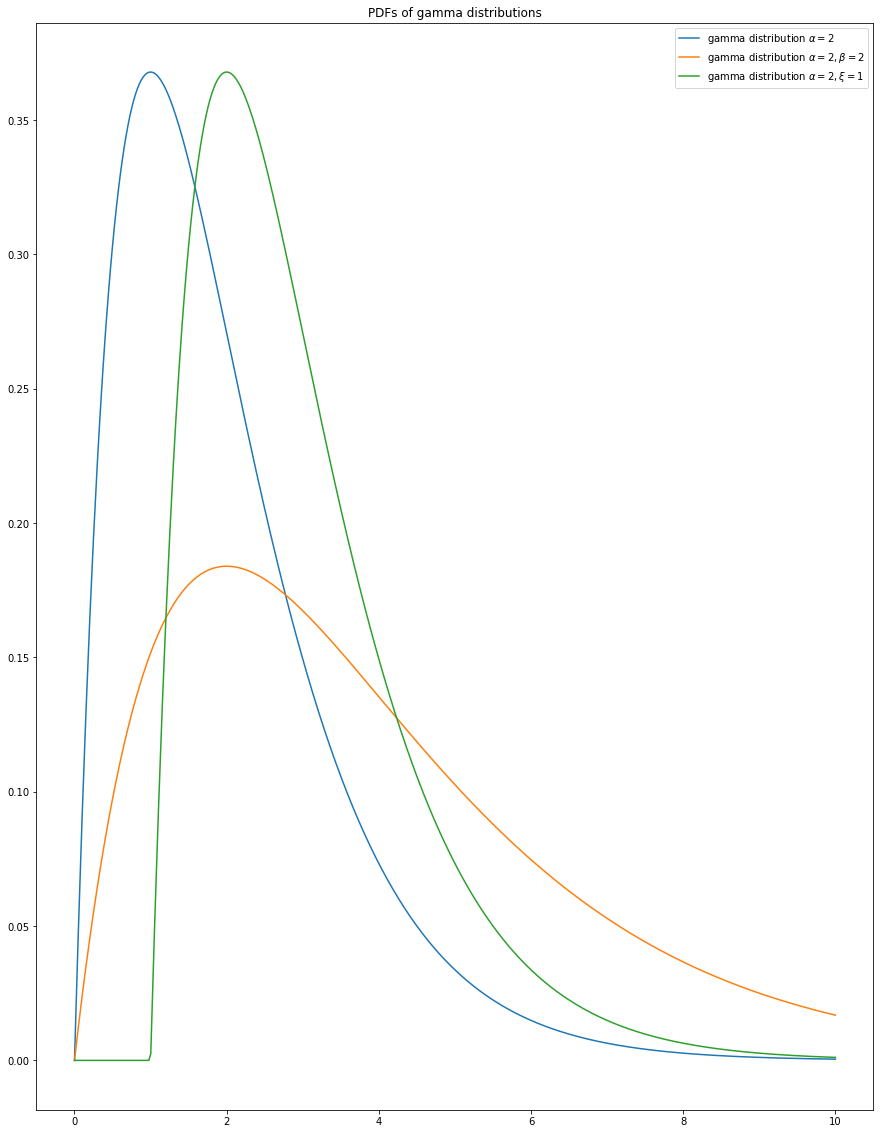

In [ ]:
x = np.linspace(0,10,400)

plt.figure(figsize = (15,20))

plt.plot(x, ss.gamma.pdf(x, a= 2),  label="gamma distribution $\\alpha= 2$")

plt.plot(x, ss.gamma.pdf(x, a= 2, scale = 2),  label="gamma distribution $\\alpha= 2, \\beta = 2$")

plt.plot(x, ss.gamma.pdf(x, a= 2, loc = 1),  label="gamma distribution $\\alpha= 2, \\xi = 1$")



plt.legend()

plt.title("PDFs of gamma distributions")

plt.show()

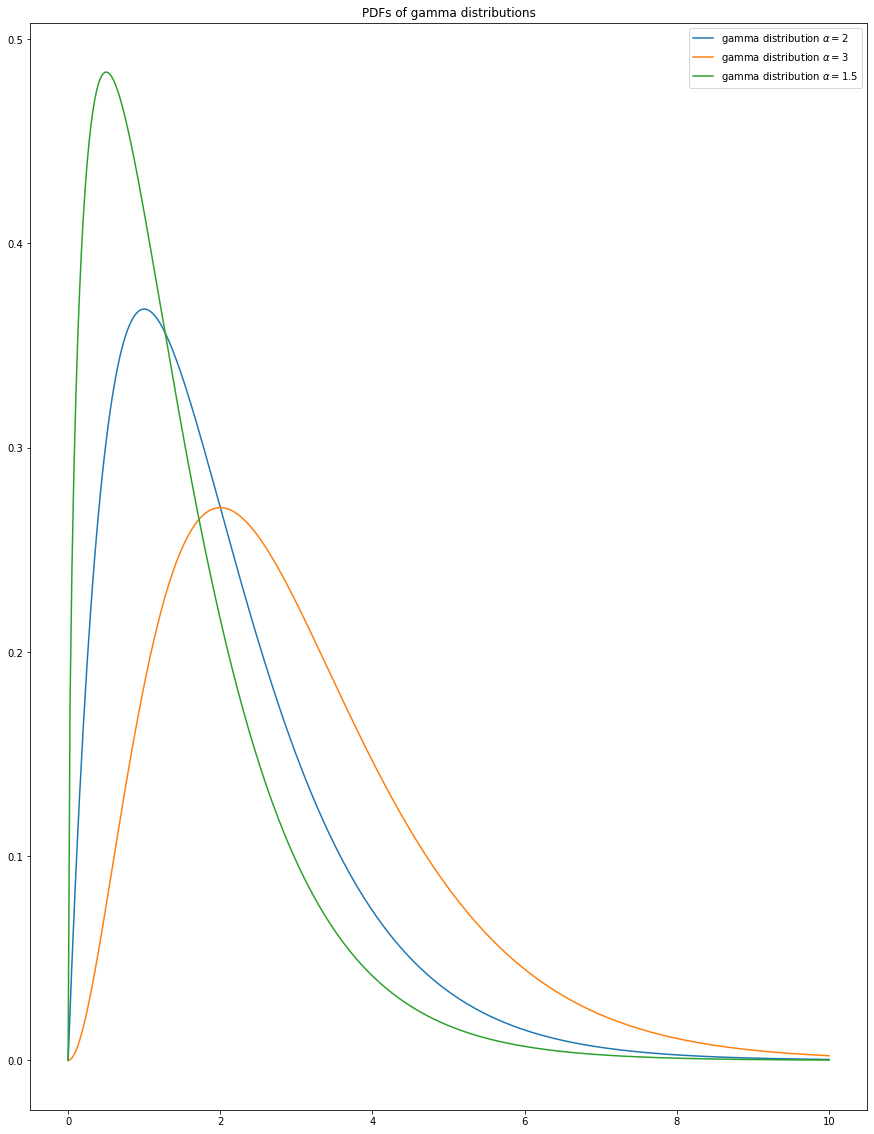

In [ ]:
x = np.linspace(0,10,400)

plt.figure(figsize = (15,20))

plt.plot(x, ss.gamma.pdf(x, a= 2),  label="gamma distribution $\\alpha= 2$")



plt.plot(x, ss.gamma.pdf(x, a= 3),  label="gamma distribution $\\alpha= 3$")

plt.plot(x, ss.gamma.pdf(x, a= 1.5),  label="gamma distribution $\\alpha= 1.5$")



plt.legend()

plt.title("PDFs of gamma distributions")

plt.show()